# ANNEXE RAPPORT

Dans ce notebook un peu spécial, nous allons avancer au même rythme que le rapport en faisant plein de petites expériences, en allant plus en profondeur dans les graphes, en regardant les différentes vitesses d'exécution des algorithmes et en parlant de choses un peu plus spécifiques liées au code que nous ne verrons pas dans le rapport

In [1]:
from BatailleNavale.bataille import *
from BatailleNavale.players import *
from BatailleNavale.utils import *
import matplotlib.pyplot as plt
import numpy as np

# Analyse Combinatoire

Ici, on veut dénombrer le nombre possible de grilles différentes


On commence donc par une majoration simple

In [2]:
nb_pos_liste_bateaux_independance([2,3,3,4,5])

Taille : 2, nb_positions : 180
Taille : 3, nb_positions : 160
Taille : 3, nb_positions : 160
Taille : 4, nb_positions : 140
Taille : 5, nb_positions : 120


77414400000

On a donc une grande majoration

On va donc essayer de faire des calculs plus frontaux

In [3]:
print(nb_pos_liste_bateaux_dependance_brute_force([2], logs=True))
print(nb_pos_liste_bateaux_dependance_brute_force([2,3], logs=True))
# print(nb_pos_liste_bateaux_dependance_brute_force([2,3,3], logs=True))

180
Time : 0.1 s
27336


Malheureusement, les calculs sont de plus en plus longs, il va donc falloir trouver un algorithme plus judicieux

On peut essayer d'utiliser la fonction d'égalité de grille

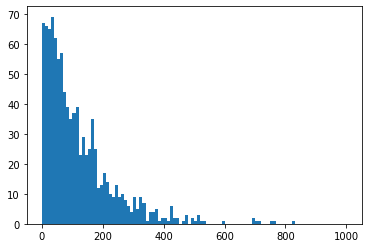

Nombre d'essai pour trouver la même grille : length : 1000, mean : 119.74, median : 84.0, ecart_type : 116.51757120709306
Nombre de grille possible : 120


In [4]:
grille = Bataille(5)
nb_test = 1000
values = histogramme(trouver_grille_similaire, nb_test, False, grille,bins=100, custom_range=(1,1000))
compare([values[0]], ["Nombre d'essai pour trouver la même grille"])
print(f'Nombre de grille possible : {nb_pos_liste_bateaux_dependance_brute_force([5])}')

On voit que la moyenne du nombre d'essai approche le nombre de grilles différentes, ce qui était attendu, sachant que les grilles étant à première vue équiprobable, on peut calculer la chance d'obtenir une grille particulière comme : $1 \over Nombre\ de\ grilles $

Malheureusement, le temps de résolution est en moyenne le nombre de grilles possibles. Ainsi, s'il y a $10^{10}$ grilles possibles, alors il faudra générer bien plus de grille pour faire une moyenne puis trouver le nombre correspondant. On se heurte donc au mêmes limites qu'à l'approche d'avant...

This will take approximatively 116 seconds


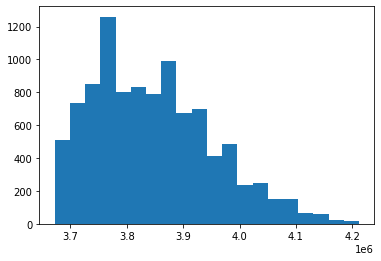

Nombre d'essai pour trouver la même grille : length : 10000, mean : 3848731.542, median : 3834000.0, ecart_type : 112909.84048355676
Nombre de grille possible : 3848040


In [17]:
nb_test = 10000
bateaux = [2,3,3]
values = histogramme(nb_pos_liste_bateaux_avec_dependance_non_lineaire, nb_test, True, bateaux, bins = 20)
compare([values[0]], ["Nombre d'essai pour trouver la même grille"])
print(f'Nombre de grille possible : {nb_pos_liste_bateaux_dependance_brute_force(bateaux)}')

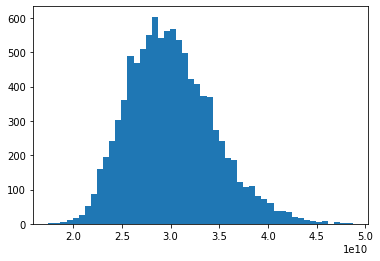

Array_00 : length : 10000, mean : 30112340031.81, median : 29733480000.0, ecart_type : 4414418222.7231


In [10]:
values = histogramme(nb_pos_liste_bateaux_avec_dependance_non_lineaire, 10000, False, [2,3,3,4,5], bins = 50) #Prend une 20aine de secondes
compare([values[0]])

On voit que l'erreur est très grande, notre approximations va de 20 Milliards à 45 Milliard

In [11]:
values_mean = [np.mean(values[0][10*i:10*i + 10]) for i in range(len(values[0])//10)]

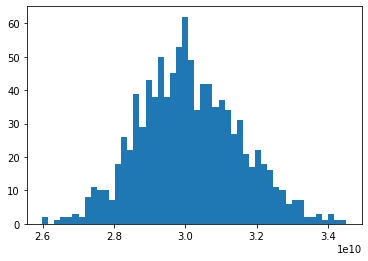

In [13]:
a = histogramme(values_mean, 0, False, bins=50)

On va donc comparer avec une autre approche, dans laquelle on fait la moyenne avant de faire le produit des coups

This will take approximatively 48 seconds


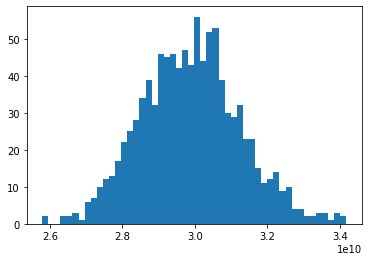

In [14]:
linear_error = histogramme(nb_pos_liste_bateaux_avec_dependance_lineaire, 1000, True, 10, [2,3,3,4,5], False)

In [15]:
compare([a[0], linear_error[0]], ['Produit puis moyenne', 'Moyenne puis produit'])

Produit puis moyenne    : length : 1000, mean : 30112340031.81, median : 30016979307.0, ecart_type : 1416091674.550545
Moyenne puis produit    : length : 1000, mean : 29889423063.252502, median : 29884592992.463997, ecart_type : 1369322470.138317


On voit ici que faire l'un ou l'autre, ne change en fait pas grand chose.

Notre dernière approche commencera en brute force, puis finira en echantillonnage.

This will take approximatively 610 seconds


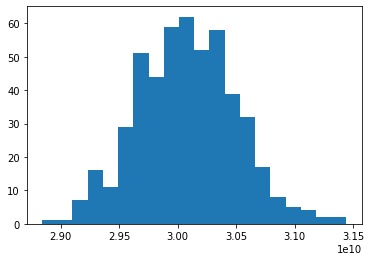

Array_00 : length : 500, mean : 30080933091.624, median : 30080880129.0, ecart_type : 419375155.22053826


In [17]:
values = histogramme(nb_pos_liste_bateaux_dependance_brute_force_puis_approx, 500, True, [2,3,3,4,5], 1, bins = 20)
compare([values[0]])

# Players

## Joueur Aléatoire

### aléatoire indépendant

This will take approximatively 47 seconds


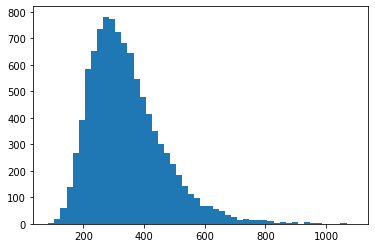

In [18]:
player = Player()
values = histogramme(player.resolve_and_reset, 10000, True)
compare([values[0]])

In [19]:
compare([values[0]])

Array_00 : length : 10000, mean : 342.8547, median : 322.0, ecart_type : 121.80903820287722


In [21]:
nb_reussite = np.sum(17 / np.arange(1,18))
print(nb_reussite)

In [22]:
nb_reussite * 100/17

343.9552522640758

### aléatoire en 100 coups

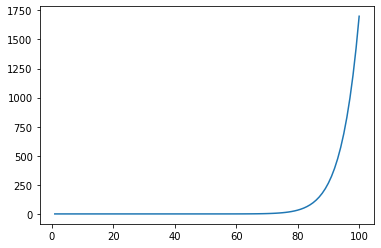

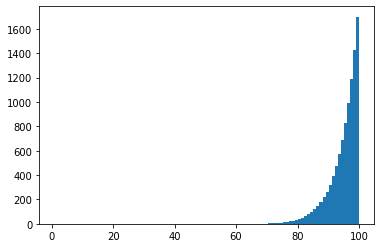

In [49]:
def factorielle(n):
    if n > 1 :
        return factorielle(n - 1) * n
    else :
        return 1

def parmi(k, n):
    return factorielle(n)//(factorielle(k) * factorielle(n - k))

def proba_victoire_en_X_coups(X):
    if X < 17 or X > 100:
        return 0
    else:
        produit = factorielle(83) * 17
        for x in range(X - 16, X):
            if x != 0:
                produit *= x
        return produit

somme = 0
for i in range(101):
    somme += proba_victoire_en_X_coups(i)
assert(somme == factorielle(100))

Y = [proba_victoire_en_X_coups(i) / factorielle(100) * 10000 for i in range(1, 101)]
X = [i for i in range(1, 101)]
plt.plot(X, Y)
plt.show()

value = np.zeros(sum([int(i) for i in Y]))
i = 0
for x, y in zip(X, Y):
    for k in range(int(y)):
        value[i] = x
        i += 1;

plt.hist(value, bins=100, range=(1,100))
plt.show()

This will take approximatively 23 seconds


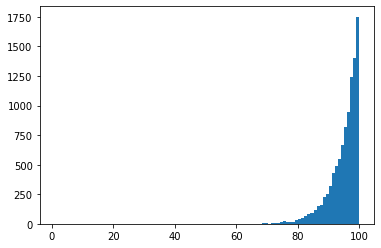

In [51]:
player = RandomPlayer()
values = histogramme(player.resolve_and_reset, 10000, True, bins=100, custom_range=(1,100))

## Joueur Heuristique

This will take approximatively 12 seconds


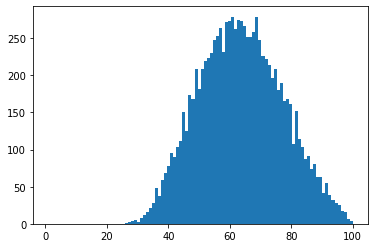

In [2]:
player = HeuristicPlayer()
values = histogramme(player.resolve_and_reset, 10000, True, bins=100, custom_range=(1,100))

In [3]:
compare([values[0]])

Array_00 : length : 10000, mean : 63.7114, median : 63.0, ecart_type : 13.66784950312228


## Joueur Probabiliste

This will take approximatively 425 seconds


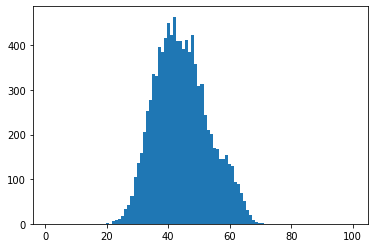

In [3]:
player = ProbabilistePlayer()
values = histogramme(player.resolve_and_reset, 10000, True, bins=100, custom_range=(1,100))
compare([values[0]])

In [4]:
compare([values[0]])

Array_00 : length : 10000, mean : 44.3418, median : 44.0, ecart_type : 8.815053758202497
